In [1]:
# Importing libraries needed for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (15,8)

plt.style.use('Solarize_Light2')

In [2]:
# loading dataset

df = pd.read_csv(r'C:\Users\Dewoyin\Documents\excel datasets for python analysis\covid 19 data\worldwide covid data.csv')
covid_df = df.copy()

covid_df.head()


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1M population,Deaths/1M population,Total Tests,Tests/1M population,Population
0,Afghanistan,156397,7290,128982.0,20125.0,3899,182,777578.0,19384.0,40114009
1,Albania,190125,2970,178998.0,8157.0,66164,1034,1334004.0,464238.0,2873536
2,Algeria,207385,5954,142332.0,59099.0,4616,133,230861.0,5139.0,44922583
3,Andorra,15717,130,15392.0,195.0,202975,1679,193595.0,2500161.0,77433
4,Angola,64762,1723,61092.0,1947.0,1891,50,1140341.0,33297.0,34247275


In [3]:
# checking for missing values

covid_df.isnull().sum()

Country                      0
Total Cases                  0
Total Deaths                 0
Total Recovered              2
Active Cases                 2
Total Cases/1M population    0
Deaths/1M population         0
Total Tests                  4
Tests/1M population          4
Population                   0
dtype: int64

In [4]:
covid_df[(covid_df['Total Recovered'].isnull())|(covid_df['Active Cases'].isnull())|(covid_df['Total Tests'].isnull())|(covid_df['Tests/1M population'].isnull())]


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1M population,Deaths/1M population,Total Tests,Tests/1M population,Population
40,Comoros,4332,147,4115.0,70.0,4842,164,NaN,NaN,894657
130,Nicaragua,16699,207,4225.0,12267.0,2481,31,NaN,NaN,6731295
141,Peru,2207890,200469,NaN,NaN,65723,5967,19364380.0,576428.0,33593734
176,Tajikistan,17086,124,16960.0,2.0,1739,13,NaN,NaN,9827362
177,Tanzania,26196,725,NaN,NaN,422,12,NaN,NaN,62033339


In [5]:
# dealing with missing values

covid_df.fillna(0,inplace = True)
covid_df.isnull().sum()


Country                      0
Total Cases                  0
Total Deaths                 0
Total Recovered              0
Active Cases                 0
Total Cases/1M population    0
Deaths/1M population         0
Total Tests                  0
Tests/1M population          0
Population                   0
dtype: int64

In [6]:
# descriptive analysis summary

covid_df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1M population,Deaths/1M population,Total Tests,Tests/1M population,Population
count,1.960000e+02,196.000000,1.960000e+02,1.960000e+02,196.000000,196.000000,1.960000e+02,1.960000e+02,1.960000e+02
mean,1.283176e+06,25913.336735,1.152993e+06,9.389808e+04,57058.724490,927.545918,2.084643e+07,1.078166e+06,4.009353e+07
std,4.633190e+06,85571.555469,4.067061e+06,6.669948e+05,52966.988865,970.235426,7.549034e+07,1.926248e+06,1.482287e+08
min,2.623000e+03,3.000000,0.000000e+00,-1.934000e+03,68.000000,3.000000,0.000000e+00,0.000000e+00,3.402800e+04
25%,2.265575e+04,334.750000,1.547300e+04,7.735000e+02,6352.250000,114.500000,3.204612e+05,9.423825e+04,1.987648e+06
50%,1.824030e+05,2435.500000,1.354610e+05,6.516500e+03,47229.500000,628.000000,1.910720e+06,4.507065e+05,8.908211e+06
75%,6.641715e+05,11974.500000,6.006825e+05,3.361550e+04,95085.000000,1587.250000,1.084762e+07,1.289491e+06,2.895150e+07
max,4.753654e+07,778316.000000,3.760454e+07,9.153680e+06,238356.000000,5967.000000,7.144440e+08,1.502813e+07,1.439324e+09


In [7]:
# information about the colums

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    196 non-null    object 
 1   Total Cases                196 non-null    int64  
 2   Total Deaths               196 non-null    int64  
 3   Total Recovered            196 non-null    float64
 4   Active Cases               196 non-null    float64
 5   Total Cases/1M population  196 non-null    int64  
 6   Deaths/1M population       196 non-null    int64  
 7   Total Tests                196 non-null    float64
 8   Tests/1M population        196 non-null    float64
 9   Population                 196 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 15.4+ KB


In [8]:
#renaming columns

covid_df.columns = ['Country','Total_cases', 'Total_deaths', 'Total_recovered', 'Active_cases', 'Total_cases_per_million_population', 'Deaths_cases_per_million_population', 'Total_tests', 'Tests_per_million_population', 'Population']
covid_df.head()

,Country,Total_cases,Total_deaths,Total_recovered,Active_cases,Total_cases_per_million_population,Deaths_cases_per_million_population,Total_tests,Tests_per_million_population,Population
0,Afghanistan,156397,7290,128982.0,20125.0,3899,182,777578.0,19384.0,40114009
1,Albania,190125,2970,178998.0,8157.0,66164,1034,1334004.0,464238.0,2873536
2,Algeria,207385,5954,142332.0,59099.0,4616,133,230861.0,5139.0,44922583
3,Andorra,15717,130,15392.0,195.0,202975,1679,193595.0,2500161.0,77433
4,Angola,64762,1723,61092.0,1947.0,1891,50,1140341.0,33297.0,34247275


In [9]:
# Top 10 Countries with the highest population

population_df = covid_df.groupby('Country')['Population'].max().reset_index()
population_df = population_df.sort_values('Population', ascending = False).head(10)
population_df

,Country,Population
38,China,1439323776
83,India,1398383537
186,USA,333633063
84,Indonesia,277441333
136,Pakistan,226695467
25,Brazil,214606811
132,Nigeria,213047100
14,Bangladesh,166911974
147,Russia,146019304
117,Mexico,130767624


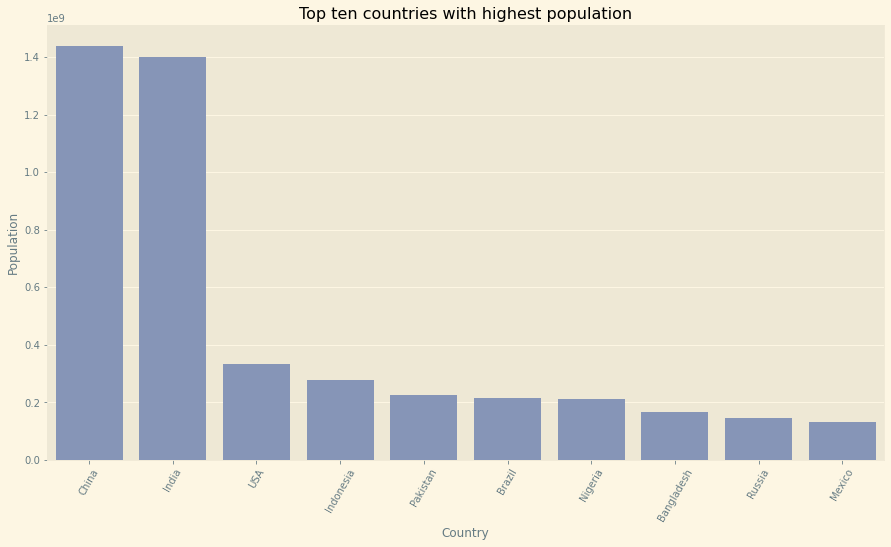

In [10]:
# Graphical representation of the country's population
color = sns.color_palette("ch:s=.25,rot=-.25")
sns.barplot(data = population_df, x ='Country', y = 'Population', color = color[2] )
plt.title('Top ten countries with highest population')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = '60')
plt.show()

In [11]:
#Top 10 countries with the highest covid cases

Top_country_cases = covid_df.groupby('Country')['Total_cases'].max().reset_index()
Top_country_cases = Top_country_cases.sort_values('Total_cases', ascending = False).head(10)
Top_country_cases

,Country,Total_cases
186,USA,47536536
83,India,34386786
25,Brazil,21897025
185,UK,9366676
147,Russia,8873655
183,Turkey,8288165
63,France,7232157
85,Iran,6004460
6,Argentina,5299418
167,Spain,5032056


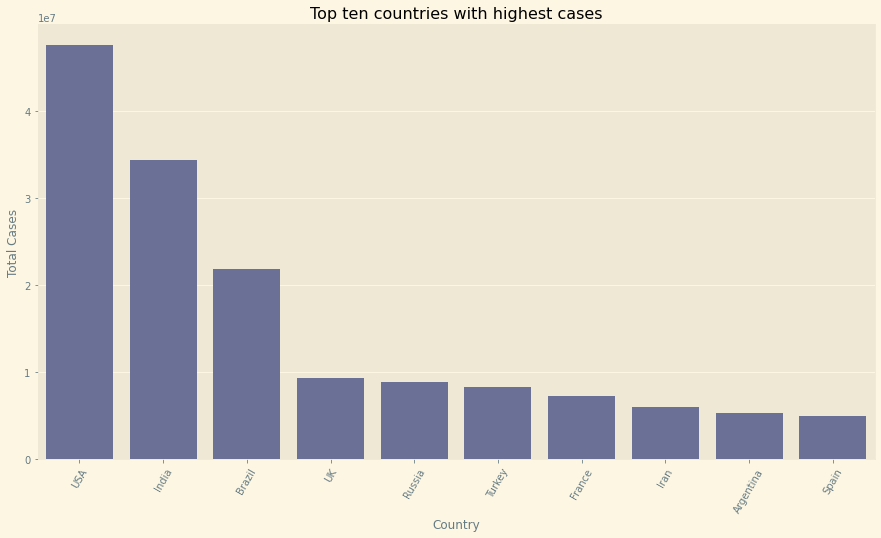

In [12]:
# Visualizing top 10 countries with highest cases

color = sns.color_palette("ch:s=.25,rot=-.25")
sns.barplot(data = Top_country_cases, x ='Country', y = 'Total_cases', color = color[3] )
plt.title('Top ten countries with highest cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation = '60')
plt.show()

In [13]:
# countries with the lowest covid cases

lowest_country_cases = covid_df.groupby('Country')['Total_cases'].max().reset_index()
lowest_country_cases = lowest_country_cases.sort_values('Total_cases', ascending = True).head(10)
lowest_country_cases

,Country,Total_cases
21,Bhutan,2623
119,Monaco,3451
104,Liechtenstein,3703
154,Sao Tome and Principe,3730
152,Saint Martin,3872
5,Antigua and Barbuda,4091
40,Comoros,4332
161,Sint Maarten,4517
51,Dominica,5070
35,Chad,5105


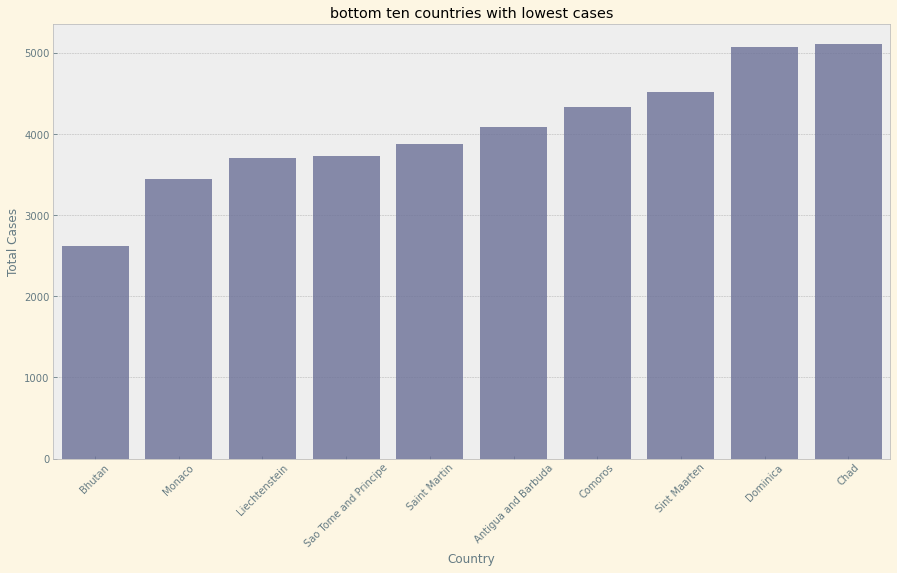

In [31]:
# Visualizing countries with lowest total cases

color = sns.color_palette("ch:s=.25,rot=-.25")
sns.barplot(data = lowest_country_cases, x ='Country', y = 'Total_cases', color = color[3], alpha = 0.8 )
plt.title('bottom ten countries with lowest cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation = '45')
plt.show()

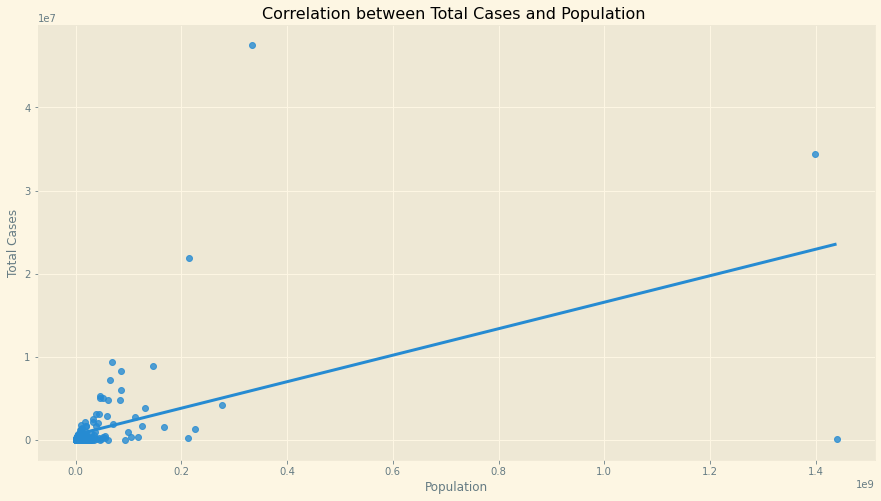

In [15]:
# Correlation between population and total cases; to ckeck if there is a positive relationship between the number of population to the total number of cases


sns.regplot(data = covid_df, x ='Population', y = 'Total_cases', ci = None )
plt.title('Correlation between Total Cases and Population ')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.xticks(rotation = 'horizontal')
plt.show()

In [16]:
#Top 10 countries with the highest total deaths

Top_Death_cases = covid_df.groupby('Country')['Total_deaths'].max().reset_index()
Top_Death_cases = Top_Death_cases.sort_values('Total_deaths', ascending = False).head(10)
Top_Death_cases

,Country,Total_deaths
186,USA,778316
25,Brazil,609816
83,India,461827
117,Mexico,289811
147,Russia,249215
141,Peru,200469
84,Indonesia,143578
185,UK,142124
89,Italy,132491
39,Colombia,127610


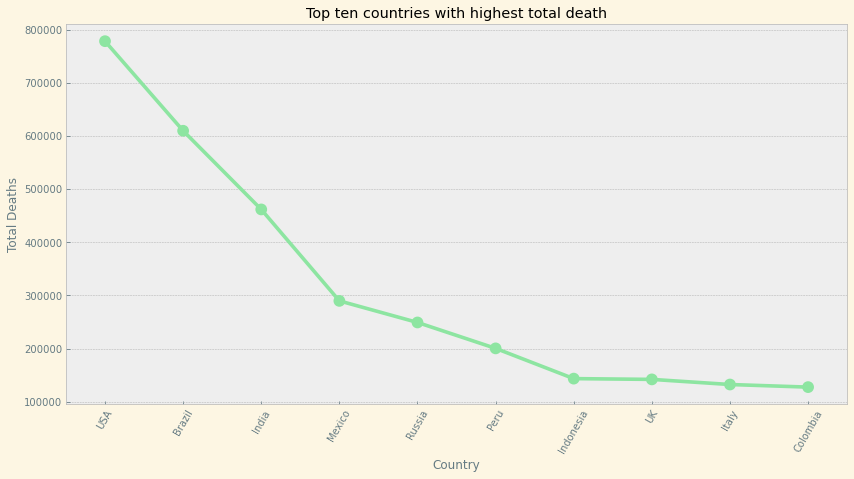

In [17]:
# Visualizing top 10 countries with highest Total deaths
plt.style.use('bmh')
plt.figure(figsize = (14,7))
color = sns.color_palette('pastel')
sns.pointplot(data = Top_Death_cases, x ='Country', y = 'Total_deaths', color = color[2] )
plt.title('Top ten countries with highest total death')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation = '60')
plt.show()

In [18]:
#countries with the lowest total deaths

lowest_Death_cases = covid_df.groupby('Country')['Total_deaths'].max().reset_index()
lowest_Death_cases = lowest_Death_cases.sort_values('Total_deaths', ascending = True).head(10)
lowest_Death_cases

,Country,Total_deaths
21,Bhutan,3
129,New Zealand,32
51,Dominica,33
82,Iceland,34
119,Monaco,36
29,Burundi,38
57,Eritrea,47
154,Sao Tome and Principe,56
152,Saint Martin,56
104,Liechtenstein,61


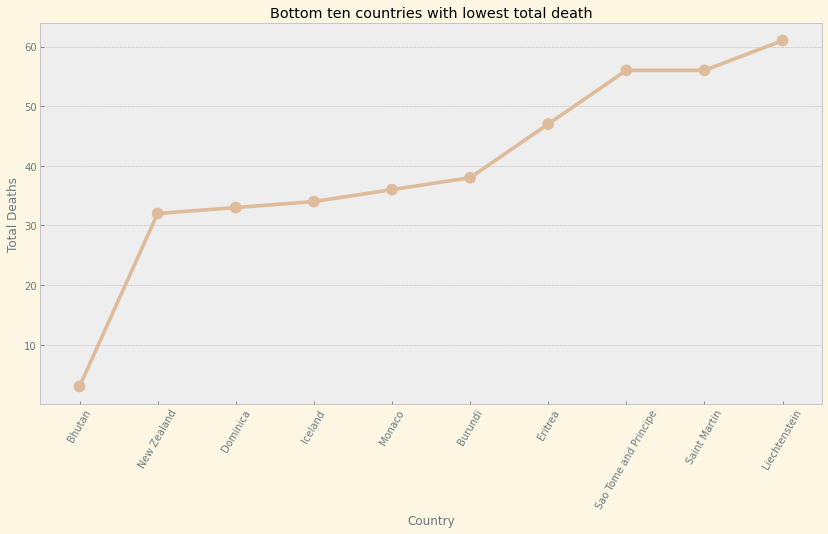

In [19]:
# Visualizing top 10 countries with highest Total deaths
plt.style.use('bmh')
plt.figure(figsize = (14,7))
color = sns.color_palette('pastel')
sns.pointplot(data = lowest_Death_cases, x ='Country', y = 'Total_deaths', color = color[5] )
plt.title('Bottom ten countries with lowest total death')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation = '60')
plt.show()

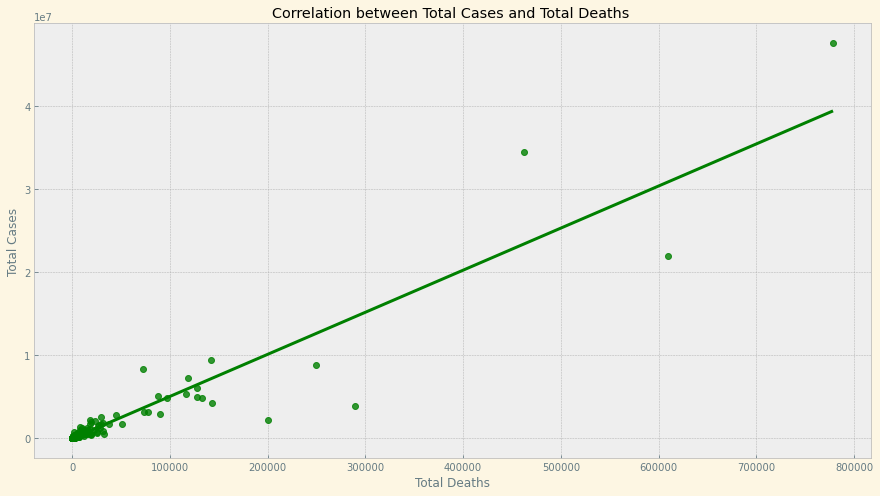

In [20]:
# Correlation between total deaths and total cases


sns.regplot(data = covid_df, x ='Total_deaths', y = 'Total_cases', ci = None, color ='g' )
plt.title('Correlation between Total Cases and Total Deaths ')
plt.xlabel('Total Deaths')
plt.ylabel('Total Cases')
plt.xticks(rotation = 'horizontal')
plt.show()

In [21]:
#Top 10 countries with the highest total recovery

recovery_cases = covid_df.groupby('Country')['Total_recovered'].max().reset_index()
recovery_cases = recovery_cases.sort_values('Total_recovered', ascending = False).head(10)
recovery_cases

,Country,Total_recovered
186,USA,37604540.0
83,India,33776053.0
25,Brazil,21100888.0
183,Turkey,7766118.0
185,UK,7665532.0
147,Russia,7619596.0
63,France,6984114.0
85,Iran,5629596.0
6,Argentina,5166251.0
167,Spain,4883752.0


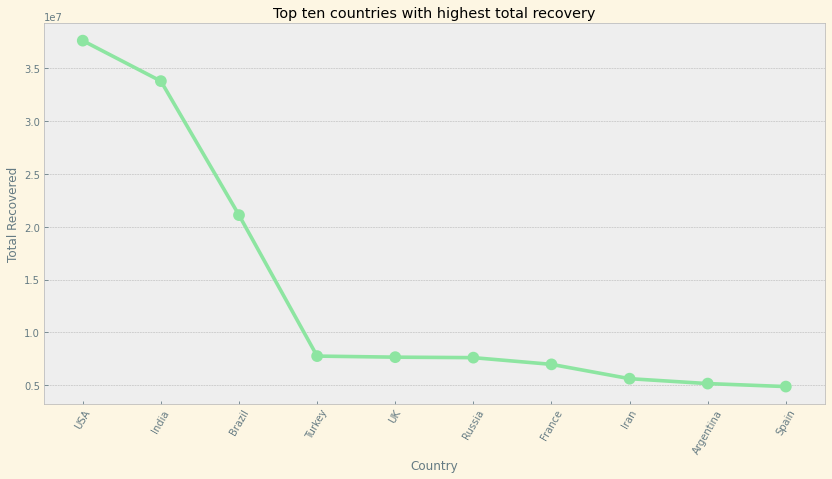

In [22]:
# Visualizing top 10 countries with highest Total recovery
plt.style.use('bmh')
plt.figure(figsize = (14,7))
color = sns.color_palette('pastel')
sns.pointplot(data = recovery_cases, x ='Country', y = 'Total_recovered', color = color[2] )
plt.title('Top ten countries with highest total recovery')
plt.xlabel('Country')
plt.ylabel('Total Recovered')
plt.xticks(rotation = '60')
plt.show()

In [23]:
# recovery rate

covid_df['Recovery_rate'] = round(100*covid_df['Total_recovered']/covid_df['Total_cases'],4) 
aveg_recovery_rate = np.mean(np.asarray(covid_df['Recovery_rate']))
aveg_recovery_rate

85.08721530612246

In [24]:
# longest to recover countries

longest_rec = covid_df.loc[covid_df['Recovery_rate'] < 50]
print(list(longest_rec['Country']))

['Burundi', 'Finland', 'French Guiana', 'Guadeloupe', 'Honduras', 'Laos', 'Martinique', 'Mauritius', 'Mayotte', 'New Caledonia', 'Nicaragua', 'Norway', 'Peru', 'Rwanda', 'Saint Martin', 'Somalia', 'Tanzania']


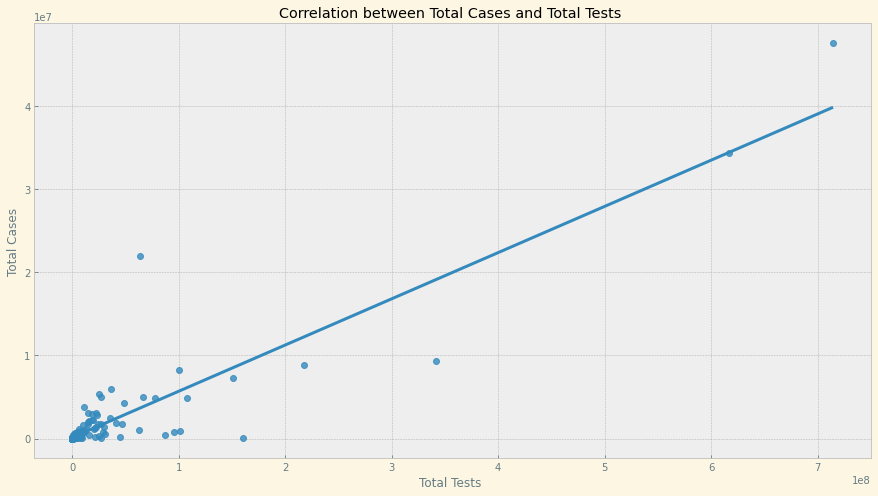

In [25]:
# Correlation between total test and total cases


sns.regplot(data = covid_df, x ='Total_tests', y = 'Total_cases', ci = None)
plt.title('Correlation between Total Cases and Total Tests ')
plt.xlabel('Total Tests ')
plt.ylabel('Total Cases')
plt.xticks(rotation = 'horizontal')
plt.show()